### Import Libraries

In [1]:
import numpy
#
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#
import sympy
sympy.init_printing()

In [2]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

### Define Variables

In [3]:
u_max, u_star, rho_max, rho_star, A, B = sympy.symbols('u_max u_star rho_max rho_star A B')

### Using Sympy to solve for A and B

In [4]:
# flux_condition1 shows that the flux is zero when rho=rho_max
# flux_grad_condition1 shows that the flux gradient is zero when rho=rho_star
# ustar_eqn give the equation for u_star
flux_condition1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
flux_grad_condition1 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
ustar_eqn = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )

In [5]:
flux_condition1

0 == rho_max*u_max*(-A*rho_max - B*rho_max**2 + 1)

In [6]:
flux_grad_condition1

0 == u_max*(-2*A*rho_star - 3*B*rho_star**2 + 1)

In [7]:
ustar_eqn

u_star == u_max*(-A*rho_star - B*rho_star**2 + 1)

In [8]:
 flux_grad_condition1 - 3*ustar_eqn

(0 == u_max*(-2*A*rho_star - 3*B*rho_star**2 + 1)) - 3*(u_star == u_max*(-A*rho_star - B*rho_star**2 + 1))

In [9]:
eq = sympy.Eq(flux_grad_condition1.lhs-3*ustar_eqn.lhs, flux_grad_condition1.rhs-3*ustar_eqn.rhs)

In [10]:
eq

-3*u_star == u_max*(-2*A*rho_star - 3*B*rho_star**2 + 1) - 3*u_max*(-A*rho_star - B*rho_star**2 + 1)

In [11]:
eq.simplify()

-3*u_star == u_max*(A*rho_star - 2)

In [12]:
eq.expand()

-3*u_star == A*rho_star*u_max - 2*u_max

In [13]:
rho_sol = sympy.solve(eq,rho_star)[0]
rho_sol

(2*u_max - 3*u_star)/(A*u_max)

In [14]:
B_sol = sympy.solve(flux_condition1,B)[0]
B_sol

(-A*rho_max + 1)/rho_max**2

In [15]:
quadA = flux_grad_condition1.subs([(rho_star, rho_sol), (B,B_sol)])
quadA

0 == u_max*(1 - 2*(2*u_max - 3*u_star)/u_max - 3*(2*u_max - 3*u_star)**2*(-A*rho_max + 1)/(A**2*rho_max**2*u_max**2))

In [16]:
quadA.simplify()

0 == -3*u_max + 6*u_star + 3*(2*u_max - 3*u_star)**2/(A*rho_max*u_max) - 3*(2*u_max - 3*u_star)**2/(A**2*rho_max**2*u_max)

#### Solve for A and B

In [17]:
A_sol = sympy.solve(quadA, A)

In [18]:
A_sol[0]

(rho_max*(2*u_max - 3*u_star)**2 - sqrt(-rho_max**2*u_star*(2*u_max - 3*u_star)**2*(4*u_max - 9*u_star)))/(2*rho_max**2*u_max*(u_max - 2*u_star))

In [19]:
A_sol[1]

(rho_max*(2*u_max - 3*u_star)**2 + sqrt(-rho_max**2*u_star*(2*u_max - 3*u_star)**2*(4*u_max - 9*u_star)))/(2*rho_max**2*u_max*(u_max - 2*u_star))

In [20]:
aval = A_sol[0].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
aval

0.0197690110272418

In [21]:
#negative root, we don't use this value
A_sol[1].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )

-0.0281023443605751

In [22]:
bval = B_sol.evalf(subs={rho_max:15.0, A:aval} )
bval

0.00312651037596166

#### Solve for theoretical density that does not allow for negative wave speed

In [23]:
rho_c = sympy.symbols('rho_c')

In [24]:
wave_speed = sympy.Eq( 0, u_max*(1 - 2*aval*rho_c-3*bval*rho_c**2) )

In [25]:
rho_solve = sympy.solve(wave_speed, rho_c)

In [26]:
type(rho_solve)

list

In [27]:
rho_solve[0]

-12.6460549622588

In [28]:
rho_solve[1]

8.43070330817253

In [ ]:
c = 

### Solve

In [29]:
type(rho_max), type(u_max)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

In [30]:
rho_max = 10.
u_max = 1.

In [31]:
def computeF(u_max, rho, aval, bval):
    return u_max*rho*(1 - aval*rho-bval*rho**2)

In [32]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho_initial: array of floats
        Array with initial values of density
    """    
    rho_initial = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho_initial[(nx-1)/2:] = 0
    
    return rho_initial

In [33]:
#Basic initial condition parameters
#defining grid size, time steps
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_light = 5.5

In [34]:
rho_initial = rho_green_light(nx, rho_light)

/Users/Luis/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


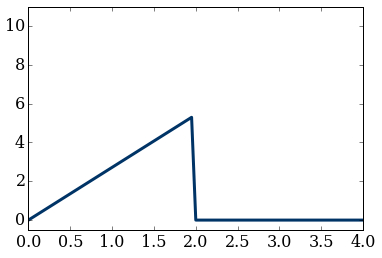

In [35]:
pyplot.plot(x, rho_initial, color='#003366', ls='-', lw=3)
pyplot.ylim(-0.5,11.);

In [36]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho))) 
    
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho, aval, bval)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()

    return rho_n

In [37]:
sigma = 1.
dt = sigma*dx/u_max

rho_n = ftbs(rho_initial, nt, dt, dx, rho_max, u_max)


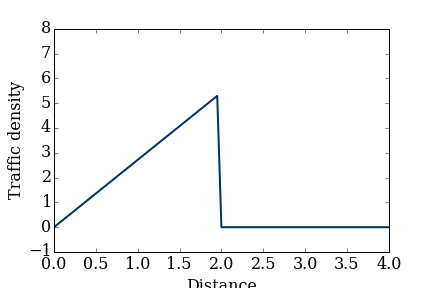
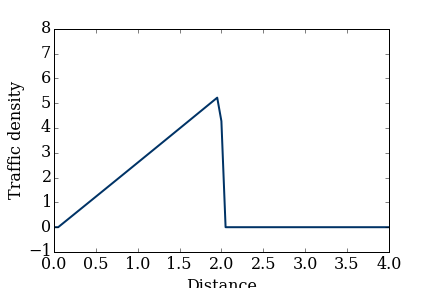
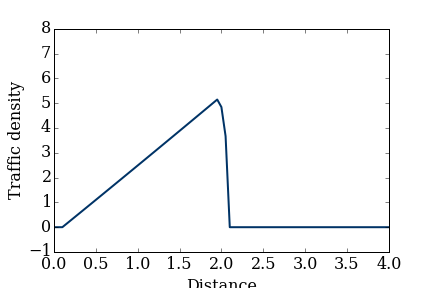
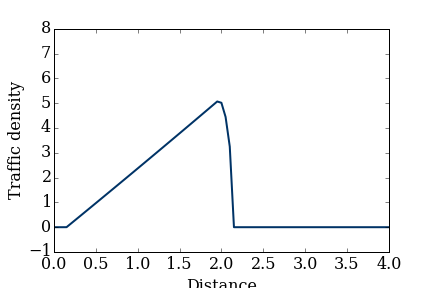
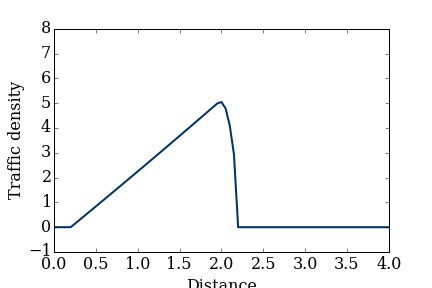
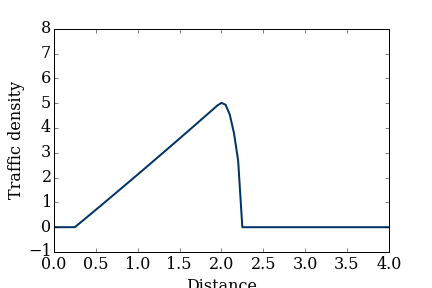
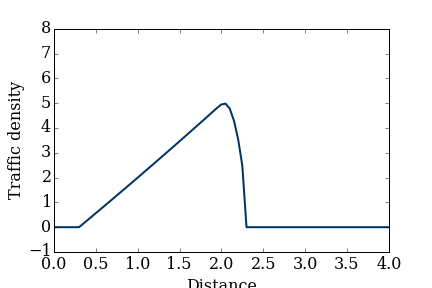
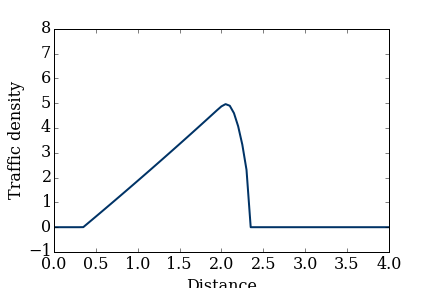
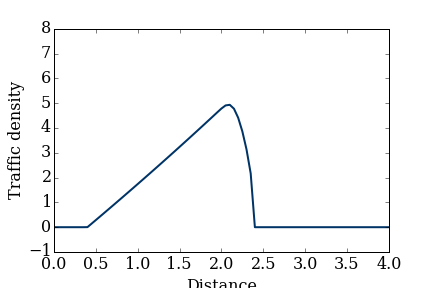
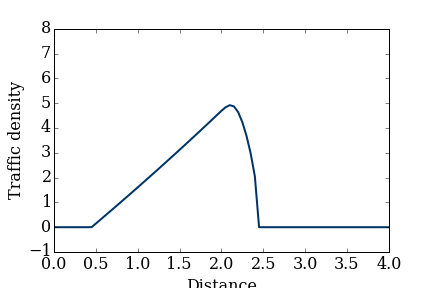
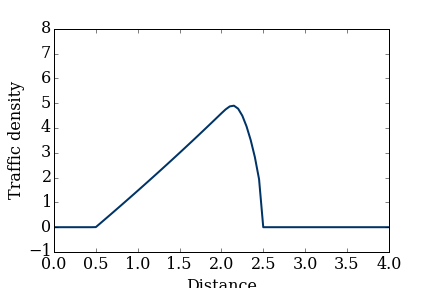
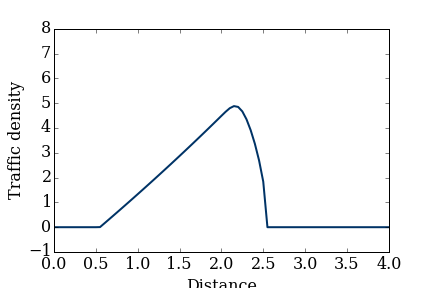
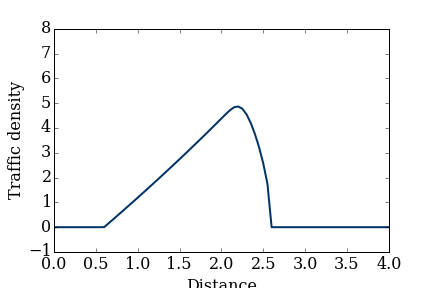
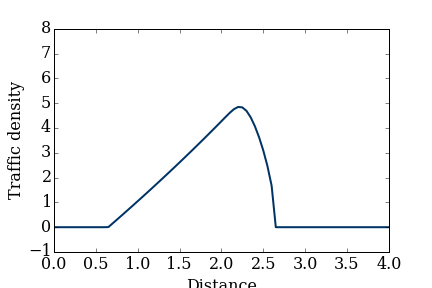
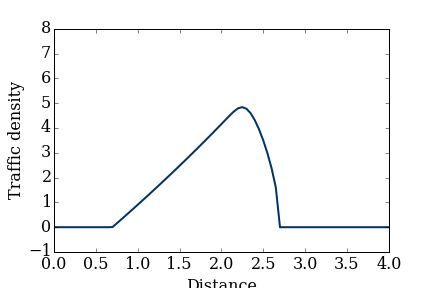
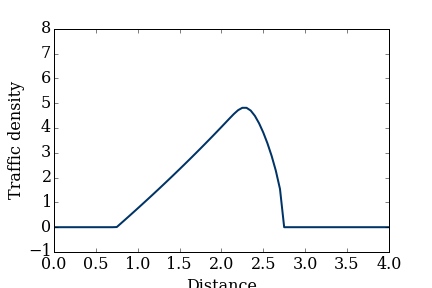
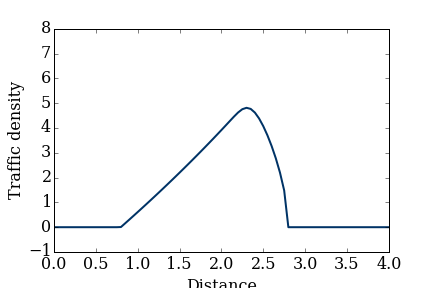
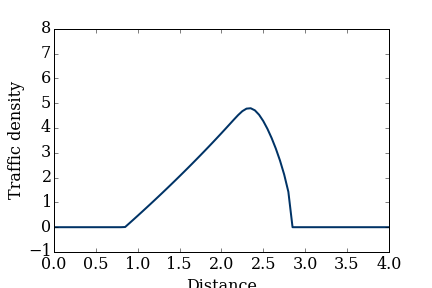
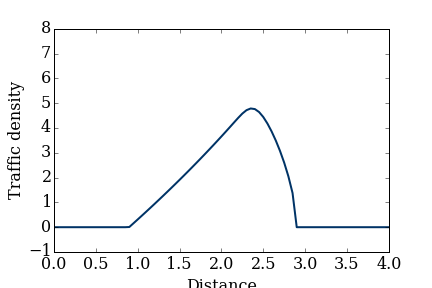
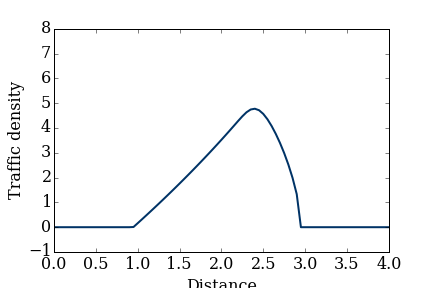
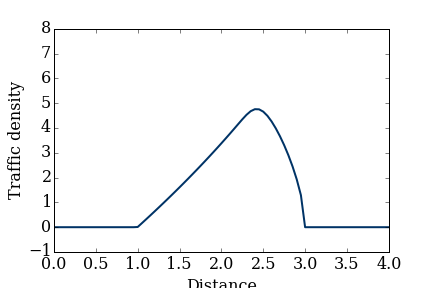
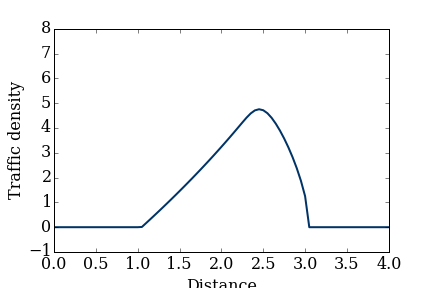
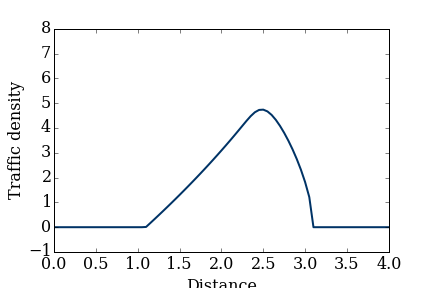
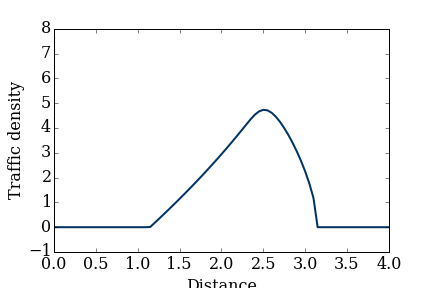
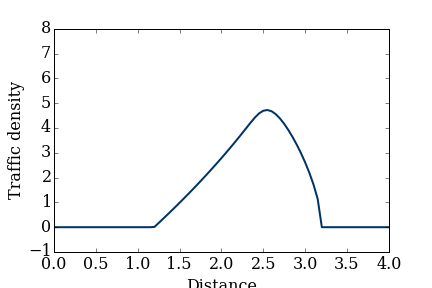
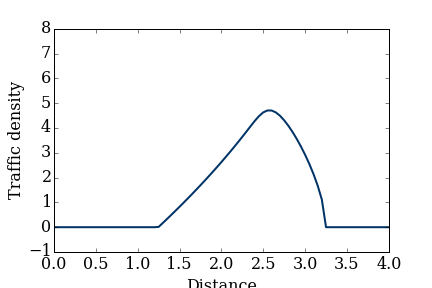
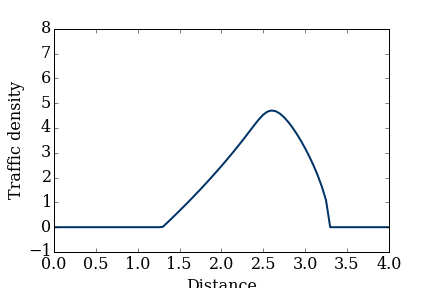
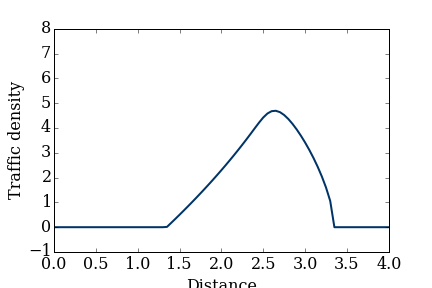
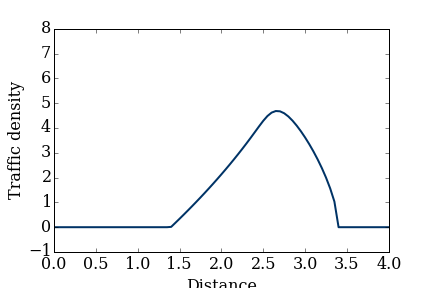
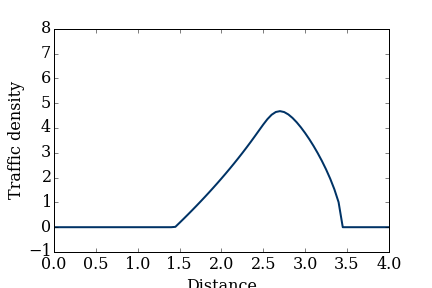

In [38]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-1,8),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')